In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
popcrime_df = pd.read_csv('atx_crime_rates_2011-2016.csv')
home_df = pd.read_csv('atx_mean_zhvi_2009-2017.csv')

In [3]:
home_df = home_df.rename(index=str, columns={"Zip Code": "zip_code"})

In [4]:
atx_zip_codes = ['78610', '78613', '78617', '78664', '78681', '78701', '78702', '78703', '78704', '78717',
                 '78721', '78722', '78723', '78725', '78726', '78727', '78728', '78729', '78731', '78733', '78735',
                 '78736', '78738', '78739', '78741', '78744', '78745', '78746', '78748', '78749', '78751', '78752',
                 '78753', '78756', '78757', '78758', '78759']
home_df = home_df[home_df['zip_code'].isin(atx_zip_codes)]

In [5]:
hmask_2011 = [x == 2011 for x in home_df.year]
home_df_2011 = home_df[hmask_2011]

In [6]:
hmask_2016 = [x == 2016 for x in home_df.year]
home_df_2016 = home_df[hmask_2016]

In [7]:
merge_years_home = pd.merge(home_df_2011, home_df_2016, on="zip_code")

In [8]:
merge_years_home['ZHVI_difference'] = merge_years_home['ZHVI_AllHomes_y'] - merge_years_home['ZHVI_AllHomes_x']

In [9]:
merge_years_home['ZHVI_percent_change'] = merge_years_home['ZHVI_difference'] / merge_years_home['ZHVI_AllHomes_x'] * 100

In [10]:
merge_years_home['ZHVI_percent_change'] = merge_years_home['ZHVI_percent_change'].round(2)

In [11]:
popcrime_df = popcrime_df.rename(index=str, columns={"Zip Code": "zip_code",
                                                  "Reports": "reports",
                                                  "Population": "population",
                                                  "Crime Rate per 100,000 people": "crime_rate_per_100,000_people",
                                                 })

In [12]:
atx_zip_codes = ['78610', '78613', '78617', '78664', '78681', '78701', '78702', '78703', '78704', '78717',
                 '78721', '78722', '78723', '78725', '78726', '78727', '78728', '78729', '78731', '78733', '78735',
                 '78736', '78738', '78739', '78741', '78744', '78745', '78746', '78748', '78749', '78751', '78752',
                 '78753', '78756', '78757', '78758', '78759']
popcrime_df = popcrime_df[popcrime_df['zip_code'].isin(atx_zip_codes)]

In [13]:
pcmask_2011 = [x == 2011 for x in popcrime_df.year]
popcrime_df_2011 = popcrime_df[pcmask_2011]

In [14]:
pcmask_2016 = [x == 2016 for x in popcrime_df.year]
popcrime_df_2016 = popcrime_df[pcmask_2016]

In [15]:
popcrime_df_2011 = popcrime_df_2011.drop(['crime_rate_per_100,000_people'], axis=1)
popcrime_df_2011 = popcrime_df_2011.rename(index=str, columns={"reports": "#_of_crimes",})

In [16]:
popcrime_df_2016 = popcrime_df_2016.drop(['crime_rate_per_100,000_people'], axis=1)
popcrime_df_2016 = popcrime_df_2016.rename(index=str, columns={"reports": "#_of_crimes",})

In [17]:
merge_years_popcrime = pd.merge(popcrime_df_2011, popcrime_df_2016, on="zip_code")

In [18]:
merge_years_popcrime['population_difference'] = merge_years_popcrime['population_y'] - merge_years_popcrime['population_x']

In [19]:
merge_years_popcrime['#_of_crimes_difference'] = merge_years_popcrime['#_of_crimes_y'] - merge_years_popcrime['#_of_crimes_x']

In [20]:
merge_years_popcrime['population_percent_change'] = merge_years_popcrime['population_difference'] / merge_years_popcrime['population_x'] * 100

In [21]:
merge_years_popcrime['population_percent_change'] = merge_years_popcrime['population_percent_change'].round(2)

In [22]:
merge_years_popcrime['crimes_percent_change'] = merge_years_popcrime['#_of_crimes_difference'] / merge_years_popcrime['#_of_crimes_x'] * 100

In [23]:
merge_years_popcrime['crimes_percent_change'] = merge_years_popcrime['crimes_percent_change'].round(2)

In [24]:
merge_years_popcrimecost = pd.merge(merge_years_popcrime, merge_years_home, on="zip_code")

In [25]:
merge_years_popcrimecost['zip_code'] = merge_years_popcrimecost.zip_code.astype(str)

In [26]:
x_axis_1 = []
counter = 1
for i in range(0,37,1):
    x_axis_1.append(counter)
    counter += 4

In [27]:
x_axis_2 = []
counter = 2
for i in range(0,37,1):
    x_axis_2.append(counter)
    counter += 4

In [28]:
x_axis_3 = []
counter = 3
for i in range(0,37,1):
    x_axis_3.append(counter)
    counter += 4

In [29]:
ticks = []
counter = 4
for i in range(0,37,1):
    ticks.append(counter)
    counter += 4

In [30]:
# len(x_axis_1)
# len(x_axis_2)
len(ticks)

37

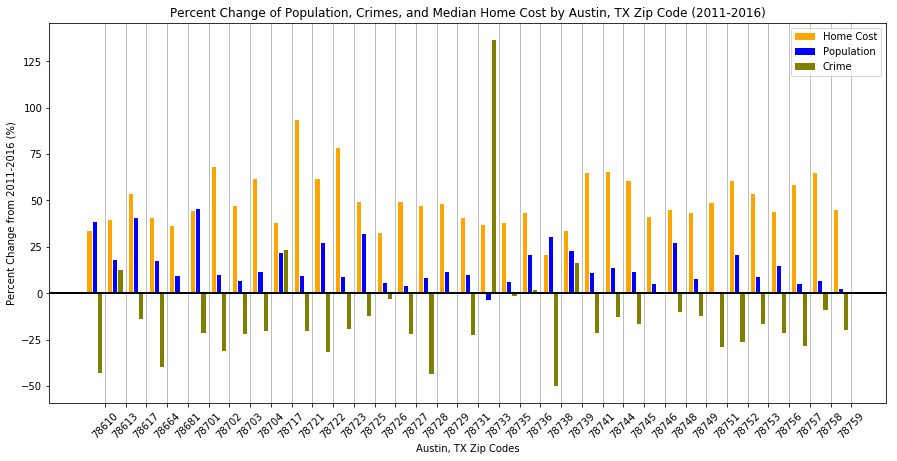

In [31]:
perc_change_cost = merge_years_popcrimecost['ZHVI_percent_change']
perc_change_pop = merge_years_popcrimecost['population_percent_change']
perc_change_crime = merge_years_popcrimecost['crimes_percent_change']

zip_code_all = merge_years_popcrimecost['zip_code']
 
# Create bars
plt.bar(x_axis_1, perc_change_cost, color='orange', alpha=1, label="Home Cost")
plt.bar(x_axis_2, perc_change_pop, color='blue', alpha=1, label="Population")
plt.bar(x_axis_3, perc_change_crime, color='olive', alpha=1, label="Crime")
 
# Create names on the x-axis
plt.xticks(ticks, zip_code_all, rotation=45)
plt.xlabel("Austin, TX Zip Codes")
plt.ylabel("Percent Change from 2011-2016 (%)")
plt.title("Percent Change of Population, Crimes, and Median Home Cost by Austin, TX Zip Code (2011-2016)")
plt.legend()

plt.axhline(0, color='black', linewidth=2)
plt.grid(axis='x')

fig = plt.gcf()
fig.set_size_inches(15,7)

plt.savefig('popcrimecostpercentchangeBARTEST.png')
# Show graphic
plt.show()

Overall, population and median home cost in Austin increased between 2011 and 2016.
There appears to be similarities in the rate of increase for both population and median home cost.
Overall, crime decreased across most of the Austin zip codes.
There is no visibile relationship between the crime and the median home cost

In [32]:
merge_years_popcrimecost = merge_years_popcrimecost.drop(['year_x_x', 'zip_code', '#_of_crimes_x', 'population_x', 'year_y_x',
       '#_of_crimes_y', 'population_y', 'population_difference',
       '#_of_crimes_difference', 'year_x_y', 'ZHVI_AllHomes_x', 'year_y_y',
       'ZHVI_AllHomes_y', 'ZHVI_difference'], axis=1)

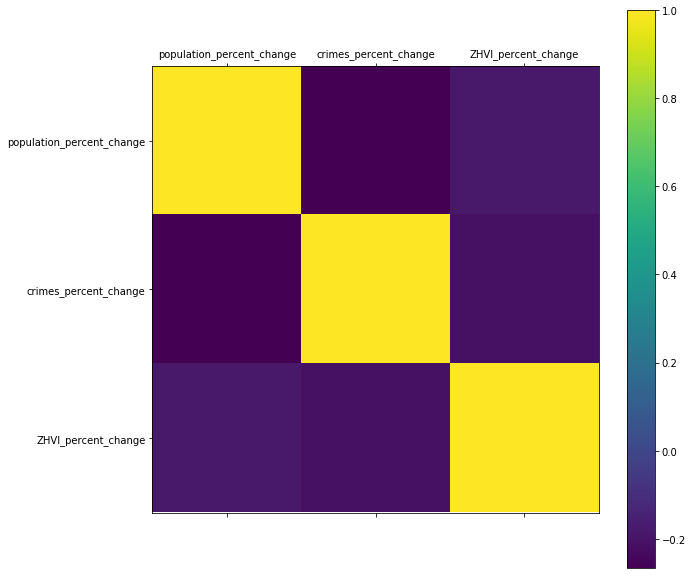

In [33]:
plt.matshow(merge_years_popcrimecost.corr())
plt.xticks(range(len(merge_years_popcrimecost.columns)), merge_years_popcrimecost.columns)
plt.yticks(range(len(merge_years_popcrimecost.columns)), merge_years_popcrimecost.columns)
plt.colorbar()

fig = plt.gcf()
fig.set_size_inches(10,10)

plt.savefig('popcrimecostpercentchangecorr.png')

plt.show()